# Zillow data set exploration

The purpose of this notebook is to explore and analyse the data for the Zillow kaggle competition. To do so, we are going to follow a typical data science pipeline: OSEMN (awesome)

1. **O**btaining
2. **S**crubbing/Cleaning
3. **E**xploring
4. **M**odelling
5. i**N**terpreting

## Obtaining the data

Available files:

* **zillow_data_dictionary.xlsx** - feature descriptions

* **sample_submission.csv** - a sample submission file in the correct format

* **properties_2016.csv/properties_2016.csv** - all the properties with their home features for 2016. Note: Some 2017 new properties don't have any data yet except for their parcelid's. Those data points should be populated when properties_2017.csv is available.

* **train_2016_v2.csv/train_2016_v2.csv** - the training set with transactions from 1/1/2016 to 12/31/2016

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

def percentageNaN(df):
    numRows = len(df)
    numNaN = df.isnull().sum()
    return numNaN/float(numRows)

In [2]:
pd.read_csv("zillow_data_dictionary.csv")

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the buildi...
6,'buildingclasstypeid',"The building framing type (steel frame, wood f..."
7,'calculatedbathnbr',Number of bathrooms in home including fractio...
8,'decktypeid',Type of deck (if any) present on parcel
9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + si...


In [3]:
# All the properties in the Zillow dataset
properties = pd.read_csv("properties_2016.csv/properties_2016.csv")

# Transactions in 2016. This includes the transaction dates, the parcelid and the logerror
# in Zillow's prediction (remember, the goal is to predict the logerror of Zillow's predictions
# and not the value of the properties itself)
transactions2016 = pd.read_csv("train_2016_v2.csv/train_2016_v2.csv")

/home/caspar/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
properties.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [5]:
transactions2016.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [6]:
properties.dtypes

parcelid                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid           float64
latitude                        float64


In [7]:
transactions2016.dtypes

parcelid             int64
logerror           float64
transactiondate     object
dtype: object

## Scrubbing/Cleaning

In [62]:
properties_copy = properties.copy()
transactions2016_copy = transactions2016.copy()

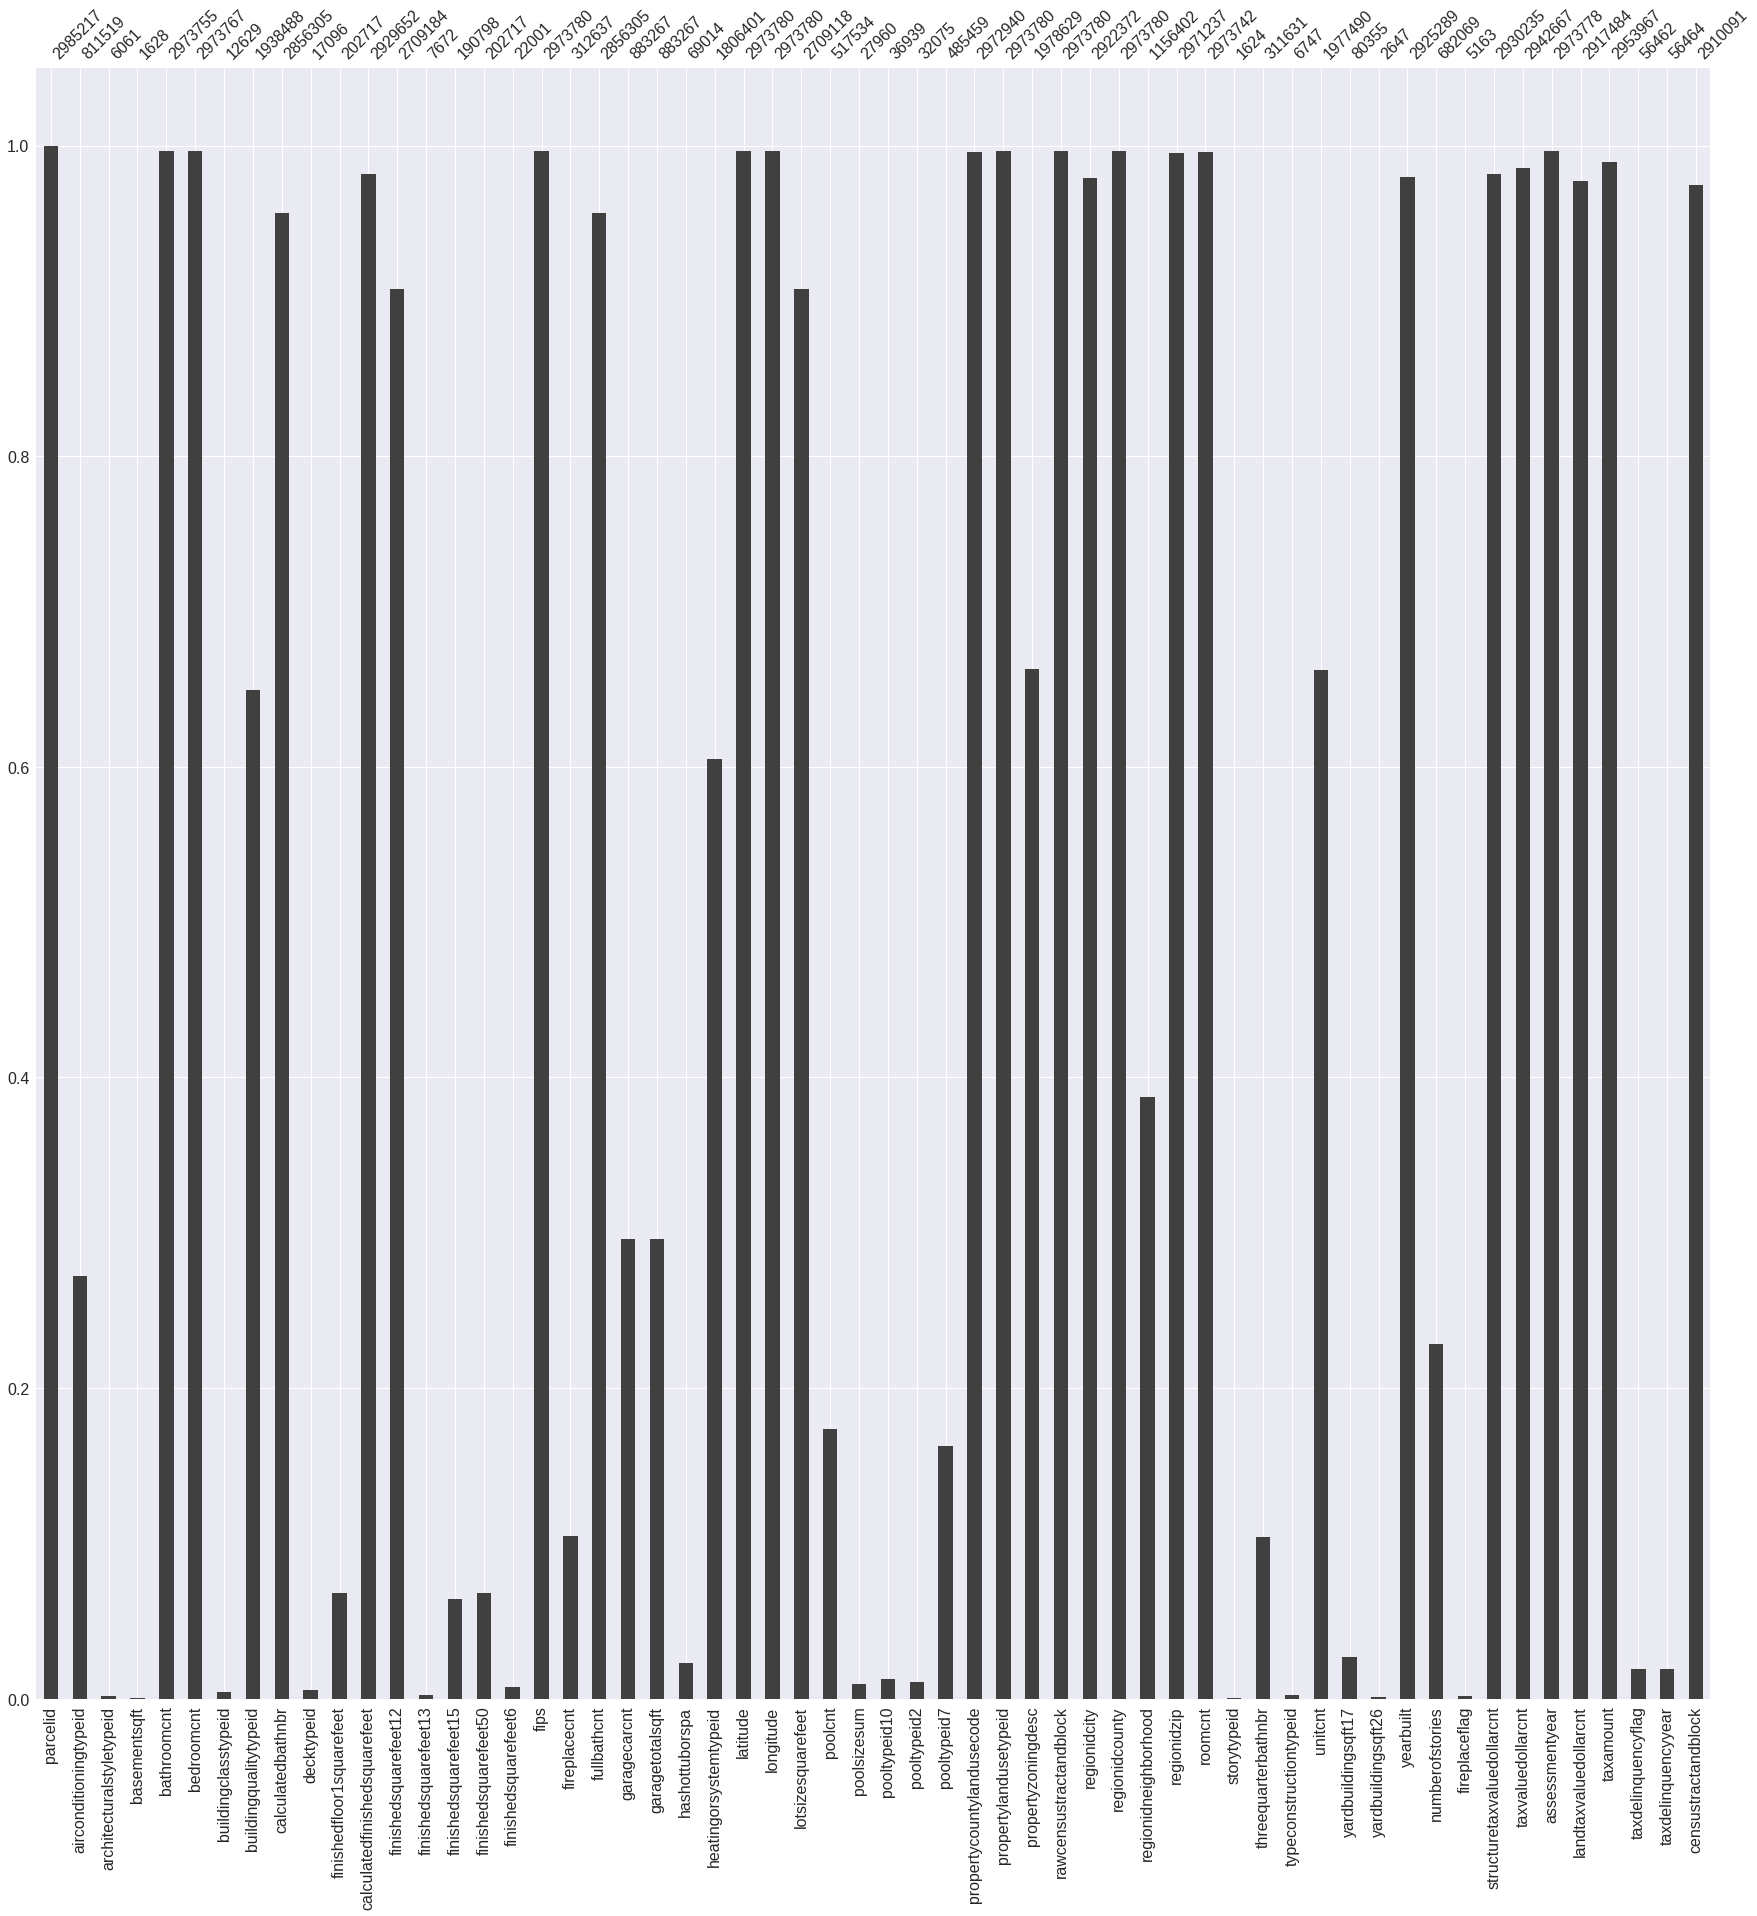

In [47]:
msno.bar(properties_copy, figsize=(30,30))

In [56]:
nan_dict={'parcelid': -1, 'airconditioningtypeid': -2, 'architecturalstyletypeid': -3, 'basementsqft': -4,
          'bathroomcnt': -5, 'bedroomcnt': -6, 'buildingclasstypeid': -7, 'buildingqualitytypeid': -8,
          'calculatedbathnbr': -9, 'decktypeid': -10, 'finishedfloor1squarefeet': -11,
          'calculatedfinishedsquarefeet': -12, 'finishedsquarefeet12': -13, 'finishedsquarefeet13': -14,
          'finishedsquarefeet15': -15, 'finishedsquarefeet50': -16, 'finishedsquarefeet6': -17, 'fips': -18,
          'fireplacecnt': -19, 'fullbathcnt': -20, 'garagecarcnt': -21, 'garagetotalsqft': -22, 'hashottuborspa': -23,
          'heatingorsystemtypeid': -24, 'latitude': -25, 'longitude': -26, 'lotsizesquarefeet': -27, 'poolcnt': -28,
          'poolsizesum': -29, 'pooltypeid10': -30, 'pooltypeid2': -31, 'pooltypeid7': -32,
          'propertycountylandusecode': -33, 'propertylandusetypeid': -34, 'propertyzoningdesc': -35,
          'rawcensustractandblock': -36, 'regionidcity': -37, 'regionidcounty': -38, 'regionidneighborhood': -39,
          'regionidzip': -40, 'roomcnt': -41, 'storytypeid': -42, 'threequarterbathnbr': -43,
          'typeconstructiontypeid': -44, 'unitcnt': -45, 'yardbuildingsqft17': -46, 'yardbuildingsqft26': -47,
          'yearbuilt': -48, 'numberofstories': -49, 'fireplaceflag': -50, 'structuretaxvaluedollarcnt': -51,
          'taxvaluedollarcnt': -52, 'assessmentyear': -53, 'landtaxvaluedollarcnt': -54, 'taxamount': -55,
          'taxdelinquencyflag': -56, 'taxdelinquencyyear': -57, 'censustractandblock': -58}

In [63]:
props_filledNa = properties_copy.fillna(nan_dict)

## Exploring

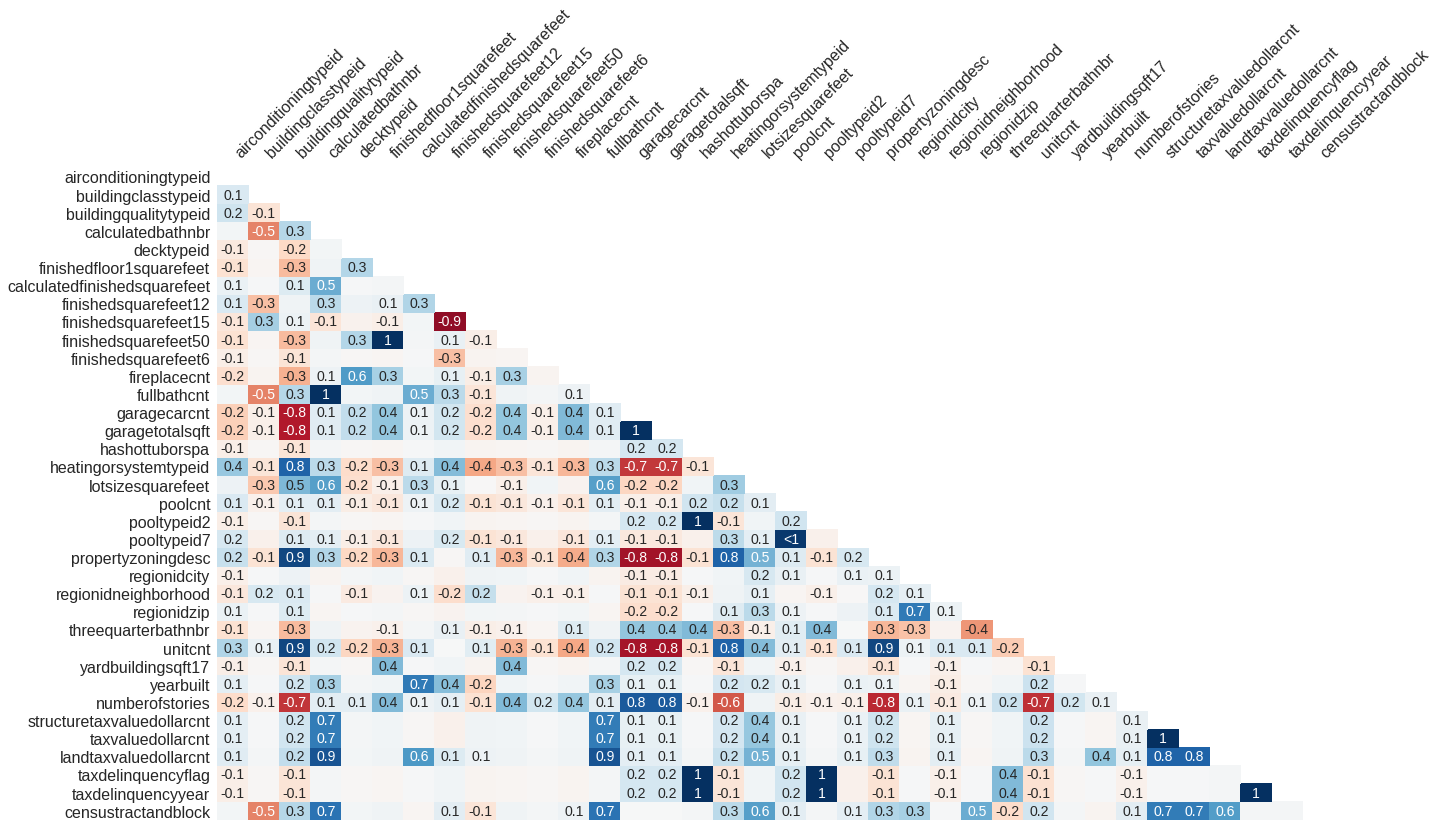

In [74]:
msno.heatmap(properties_copy.sample(100))